# ML Project 4 - Employee Turnover Analytics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('1673873196_hr_comma_sep.xlsx')

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [6]:
df.shape

(14999, 10)

# Perform data quality check by checking for missing values if any

In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

# Understand what factors contributed most to employee turnover by EDA

In [8]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [9]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [10]:
df['salary'] = df['salary'].map({'low':0,'medium':1,'high':2}).astype(int)

In [11]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [12]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [13]:
df['sales'] = df['sales'].map({'RandD':0,'marketing':1,'product_mng':2,'IT':3,'management':4,'support':5,
                               'technical':6,'hr':7,'accounting':8,'sales':9}).astype(float)

In [14]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,9.0,0
1,0.80,0.86,5,262,6,0,1,0,9.0,1
2,0.11,0.88,7,272,4,0,1,0,9.0,1
3,0.72,0.87,5,223,5,0,1,0,9.0,0
4,0.37,0.52,2,159,3,0,1,0,9.0,0


In [15]:
df['sales'].value_counts()

9.0    4140
6.0    2720
5.0    2229
3.0    1227
2.0     902
1.0     858
0.0     787
8.0     767
7.0     739
4.0     630
Name: sales, dtype: int64

In [16]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,-0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.015170,0.098119
sales,-0.015413,-0.011855,-0.005577,0.002387,0.001611,-0.019215,0.043814,-0.015170,1.000000,-0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,-0.033415,1.000000


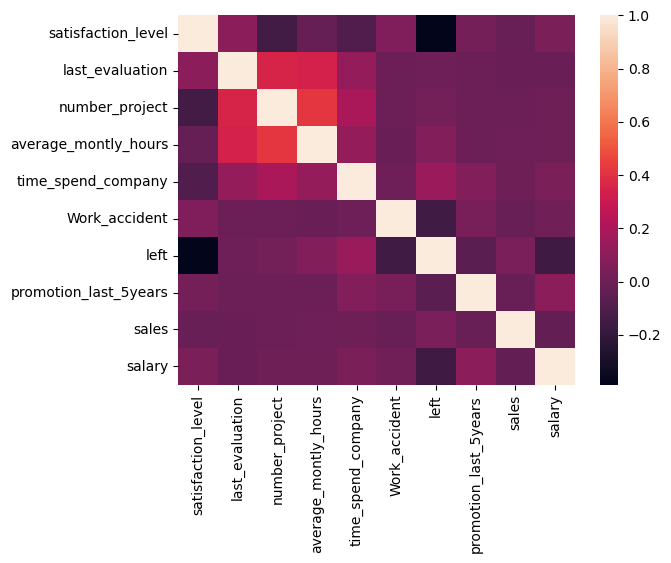

In [17]:
sns.heatmap(df.corr())
plt.show()

* From above 'left' with 'satisfaction_level', 'work_accident' and 'salary' have strong negatively correlation.
* Meanwhile 'left' with 'time_spend_company' have strong positively correlation.

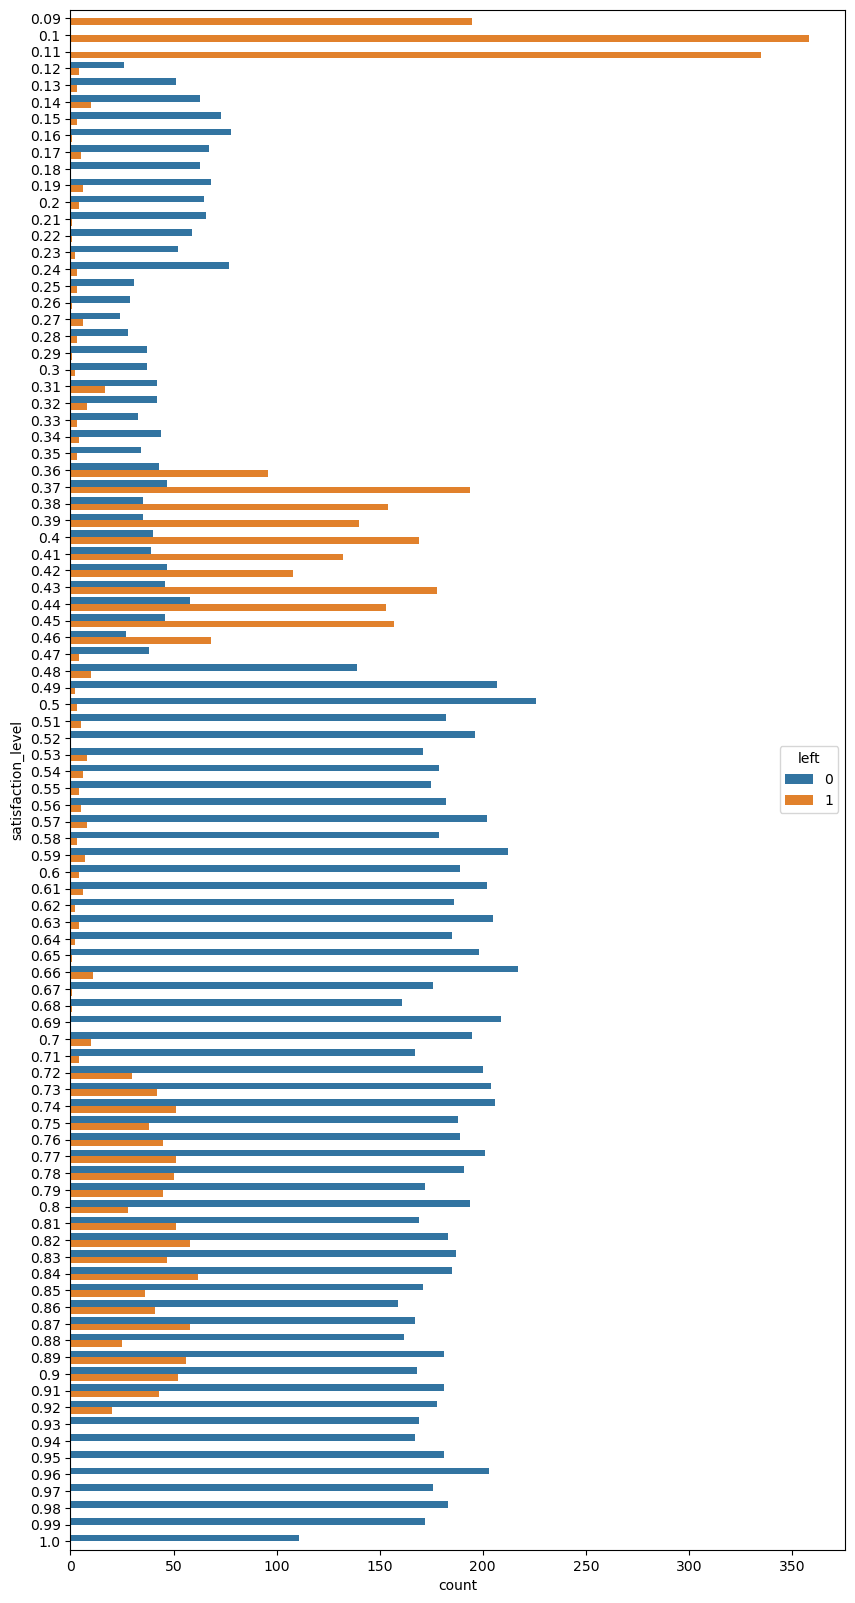

In [18]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['satisfaction_level'],hue=df['left'])
plt.show()

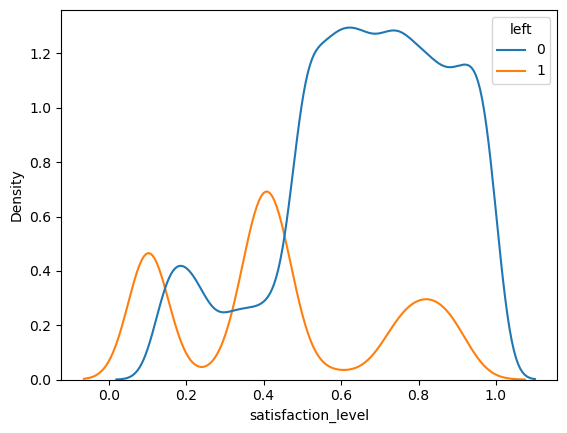

In [19]:
sns.kdeplot(df['satisfaction_level'],hue=df['left'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


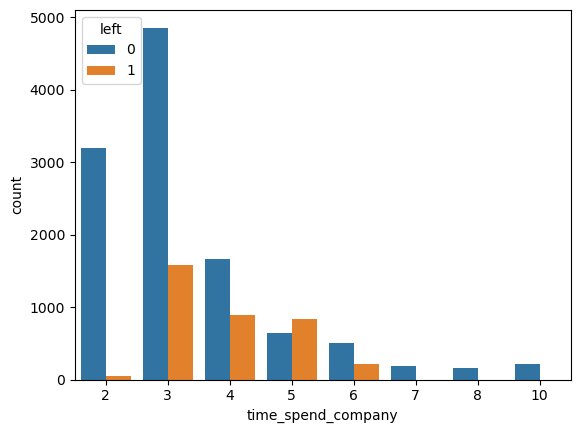

In [20]:
sns.countplot(df['time_spend_company'],hue=df['left'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


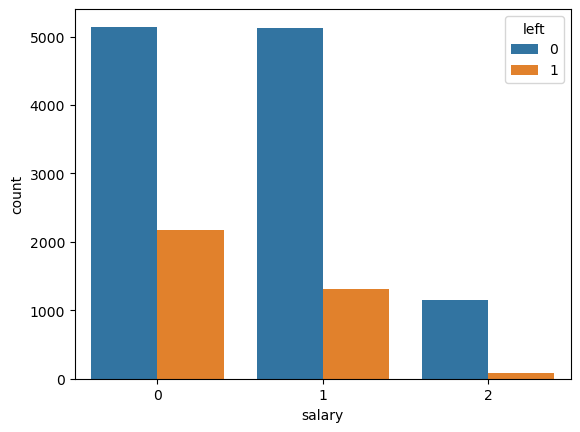

In [21]:
sns.countplot(df['salary'],hue=df['left'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


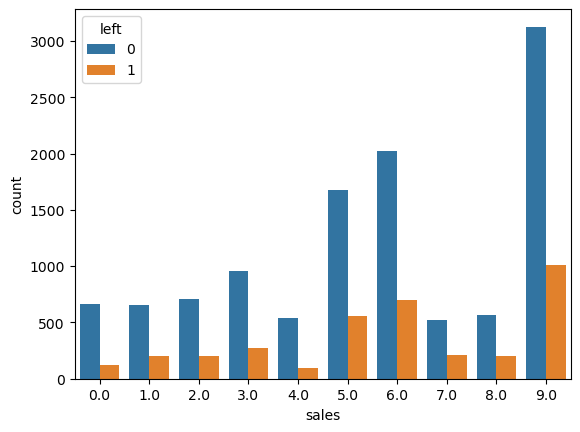

In [22]:
sns.countplot(df['sales'],hue=df['left'])
plt.show()

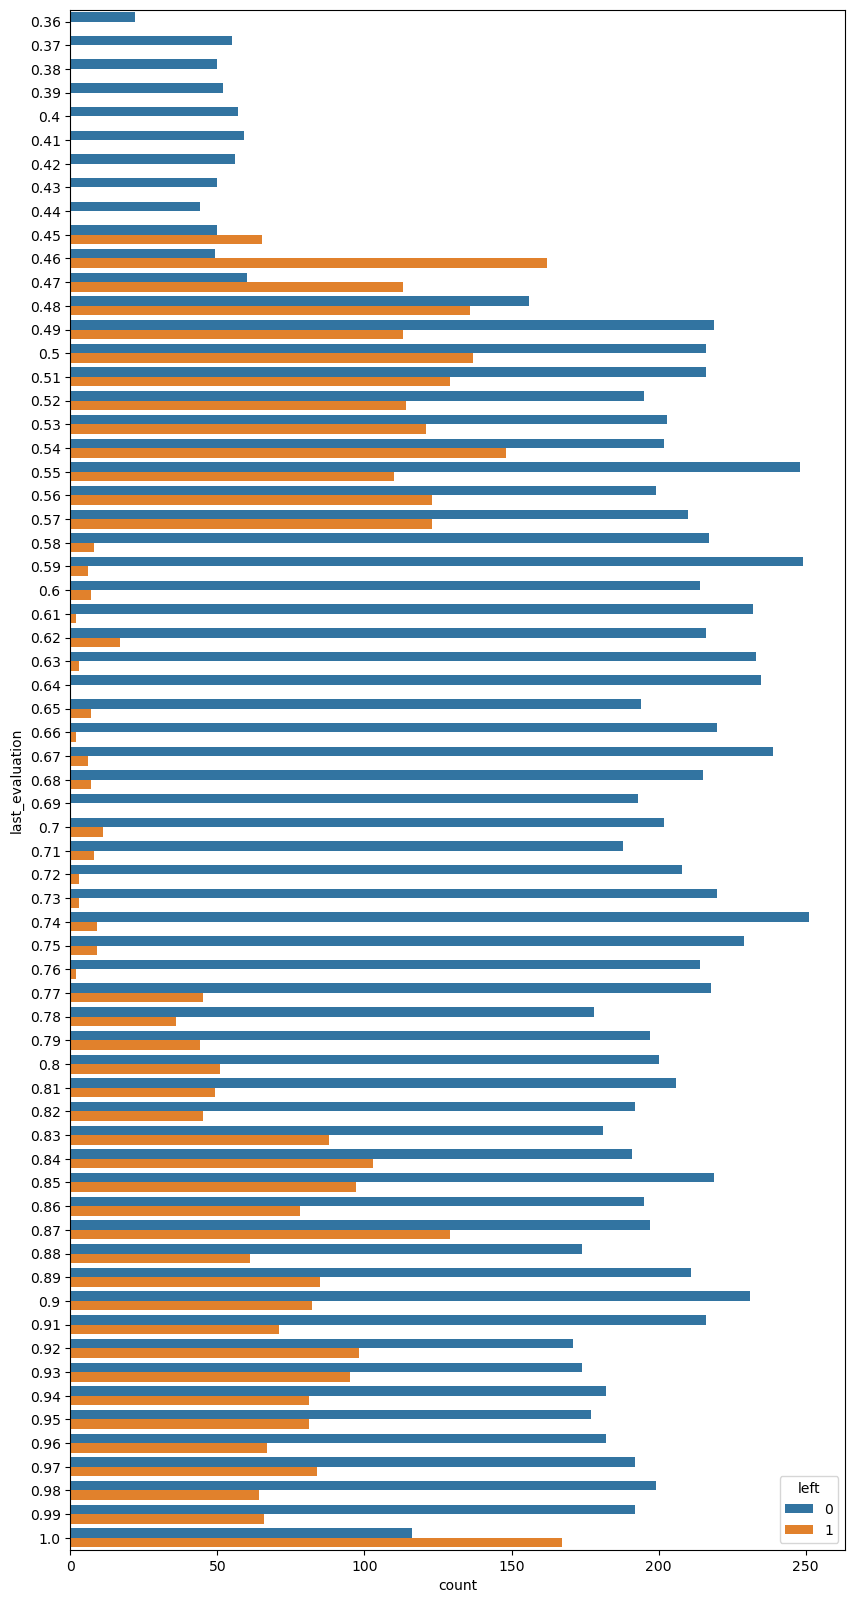

In [23]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['last_evaluation'],hue=df['left'])
plt.show()

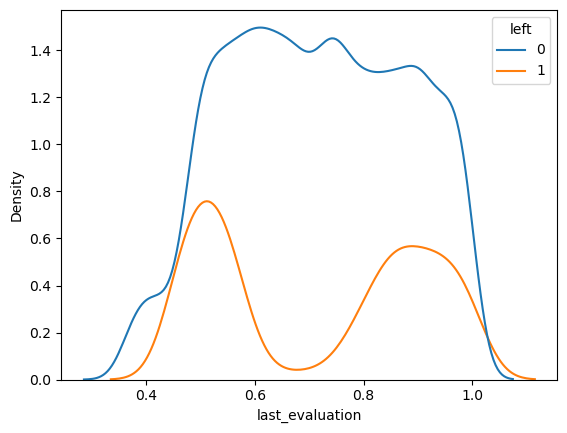

In [24]:
sns.kdeplot(df['last_evaluation'],hue=df['left'])
plt.show()

C:\Users\Vinosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


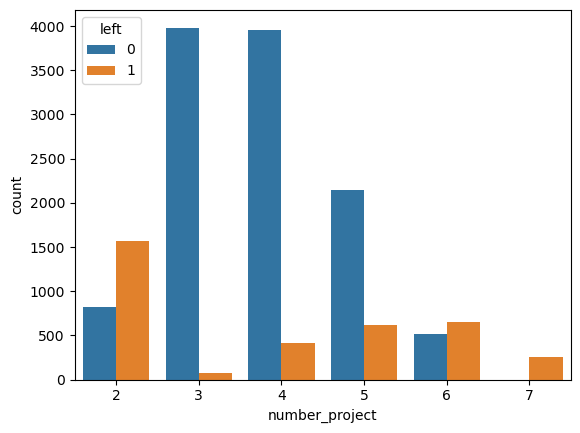

In [25]:
sns.countplot(df['number_project'],hue=df['left'])
plt.show()

<AxesSubplot:xlabel='average_montly_hours', ylabel='Density'>

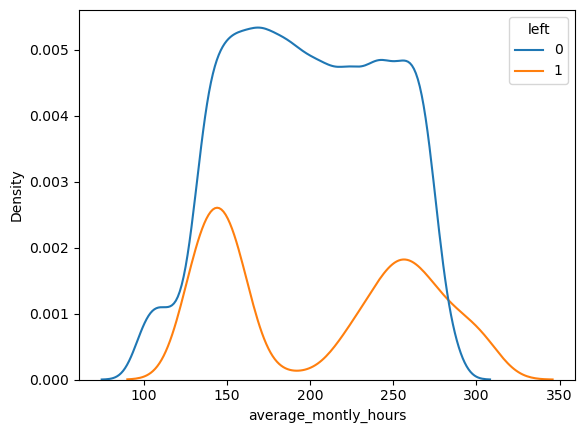

In [26]:
sns.kdeplot(df['average_montly_hours'],hue=(df['left']))

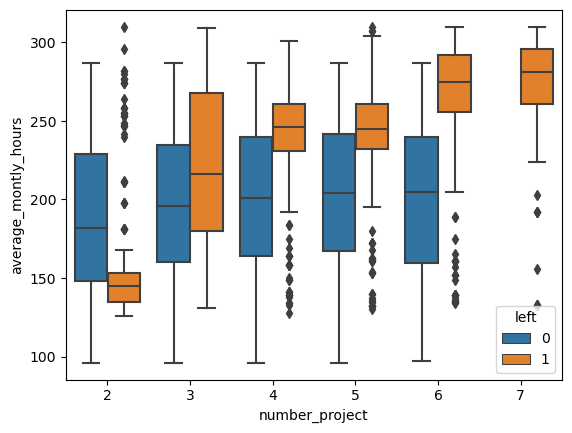

In [27]:
sns.boxplot(x=df['number_project'],y=df['average_montly_hours'],hue=df['left'])
plt.show()

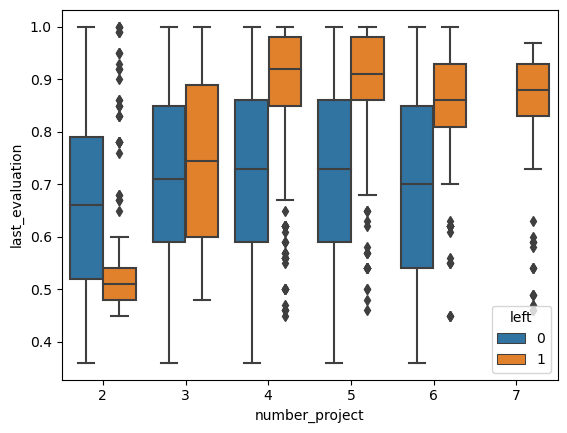

In [28]:
sns.boxplot(x=df['number_project'],y=df['last_evaluation'],hue=df['left'])
plt.show()

Summary : The factors contributed more to employee turnover is Statisfaction Level, Years at Company, Evaluation 

# Perform clustering of Employees who left based on their satisfaction and evaluation

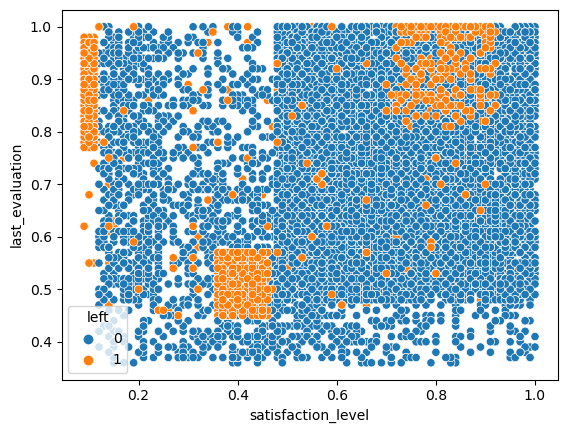

In [29]:
sns.scatterplot(x=df['satisfaction_level'],y=df['last_evaluation'],hue=df['left'])
plt.show()

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

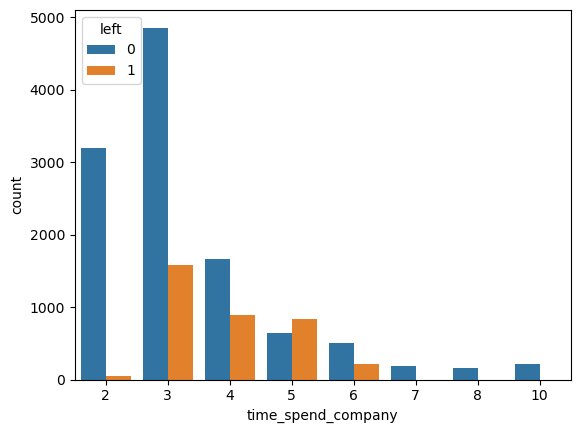

In [30]:
sns.countplot(x=df['time_spend_company'],hue=df['left'])

In [31]:
from sklearn.cluster import KMeans

In [32]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['satisfaction_level','last_evaluation']])
    sse.append(km.inertia_)

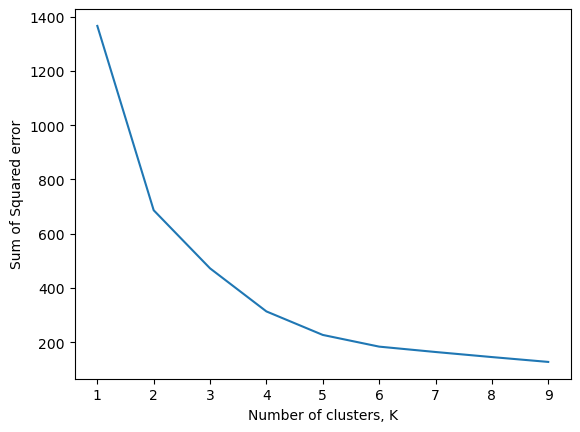

In [33]:
plt.xlabel('Number of clusters, K')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng,sse)

The number of clusters, K = 2

# Handle the left Class Imbalance using SMOTE technique

In [34]:
df[['left','satisfaction_level']].groupby(['left'],as_index = False).mean().sort_values(by='satisfaction_level',ascending=False)

,left,satisfaction_level
0,0,0.666810
1,1,0.440098


In [35]:
df[['left','Work_accident']].groupby(['left'],as_index = False).mean().sort_values(by='Work_accident',ascending = False)

,left,Work_accident
0,0,0.175009
1,1,0.047326


In [36]:
df[['left','salary']].groupby(['salary'],as_index = False).mean().sort_values(by='left',ascending = False)

,salary,left
0,0,0.296884
1,1,0.204313
2,2,0.066289


In [37]:
df[['left','time_spend_company']].groupby(['time_spend_company'],as_index = False).mean().sort_values(by='left',ascending=False)

,time_spend_company,left
3,5,0.565513
2,4,0.348064
4,6,0.291086
1,3,0.246159
0,2,0.016338
5,7,0.000000
6,8,0.000000
7,10,0.000000


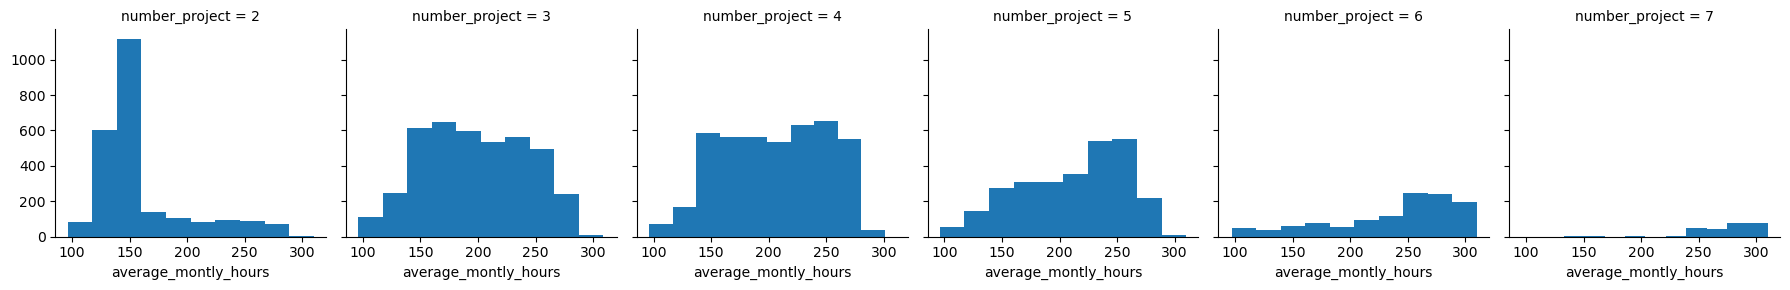

In [38]:
plot = sns.FacetGrid(df,col='number_project')
plot.map(plt.hist, 'average_montly_hours')
plt.show()

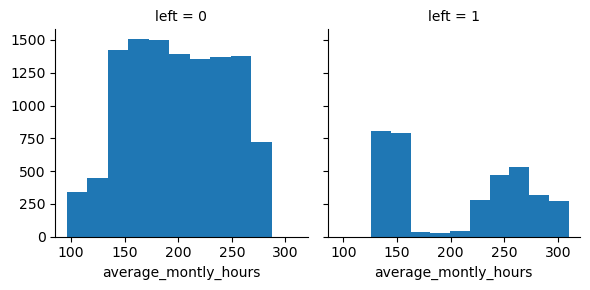

In [39]:
plot1 = sns.FacetGrid(df,col = 'left')
plot1.map(plt.hist,'average_montly_hours')
plt.show()

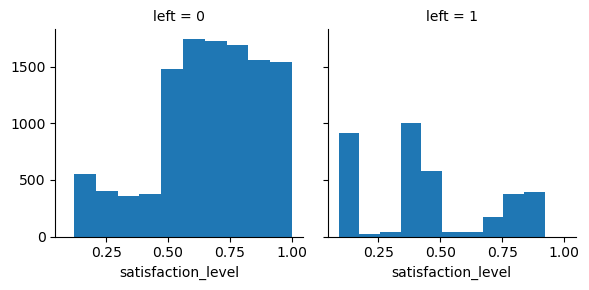

In [40]:
plot2 = sns.FacetGrid(df,col='left')
plot2.map(plt.hist,'satisfaction_level')
plt.show()

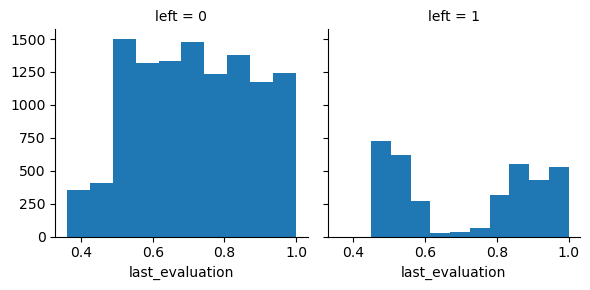

In [41]:
plot3 = sns.FacetGrid(df,col= 'left')
plot3.map(plt.hist,'last_evaluation')
plt.show()

In [42]:
df.loc[df['satisfaction_level'] <= 0.25, 'satisfaction_level'] = 0
df.loc[(df['satisfaction_level']> 0.25) & (df['satisfaction_level'] <= 0.5), 'satisfaction_level'] = 1
df.loc[(df['satisfaction_level']> 0.5) & (df['satisfaction_level'] <= 0.75), 'satisfaction_level'] = 0
df.loc[df['satisfaction_level'] > 0.75, 'satisfaction_level'] = 1
df['satisfaction_level'] = df['satisfaction_level'].astype(int)

In [43]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,1,0.53,2,157,3,0,1,0,9.0,0
1,1,0.86,5,262,6,0,1,0,9.0,1
2,0,0.88,7,272,4,0,1,0,9.0,1
3,0,0.87,5,223,5,0,1,0,9.0,0
4,1,0.52,2,159,3,0,1,0,9.0,0


In [44]:
df.loc[df['last_evaluation'] <= 0.56, 'last_evaluation'] = 0
df.loc[(df['last_evaluation'] > 0.56) & (df['last_evaluation'] <= 0.80), 'last_evaluation'] = 1
df.loc[df['last_evaluation'] > 0.80, 'last_evaluation'] = 0
df['last_evaluation'] = df['last_evaluation'].astype(int)

In [45]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,1,0,2,157,3,0,1,0,9.0,0
1,1,0,5,262,6,0,1,0,9.0,1
2,0,0,7,272,4,0,1,0,9.0,1
3,0,0,5,223,5,0,1,0,9.0,0
4,1,0,2,159,3,0,1,0,9.0,0


In [46]:
df['proj_hour'] = df.number_project * df.average_montly_hours
df.loc[:, ['proj_hour','number_project','average_montly_hours']].head(10)

,proj_hour,number_project,average_montly_hours
0,314,2,157
1,1310,5,262
2,1904,7,272
3,1115,5,223
4,318,2,159
5,306,2,153
6,1482,6,247
7,1295,5,259
8,1120,5,224
9,284,2,142


In [47]:
df= df.drop(['number_project','average_montly_hours'],axis=1)

In [48]:
df.head()

,satisfaction_level,last_evaluation,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,proj_hour
0,1,0,3,0,1,0,9.0,0,314
1,1,0,6,0,1,0,9.0,1,1310
2,0,0,4,0,1,0,9.0,1,1904
3,0,0,5,0,1,0,9.0,0,1115
4,1,0,3,0,1,0,9.0,0,318


# Perform k-fold cross-validation model training and evaluate performance

In [49]:
X = df.drop(['left'],axis=1)

In [50]:
y = df['left']

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
from sklearn.model_selection import cross_val_score, KFold

In [53]:
kfold = KFold(n_splits=10,random_state=7,shuffle=True)

In [54]:
modelCV = LogisticRegression(class_weight= 'balanced')

In [55]:
results = cross_val_score(modelCV,X,y,cv=kfold,scoring='roc_auc')

C:\Users\Vinosh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vinosh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [56]:
print('Accuracy Score :',results.mean()*100)

Accuracy Score : 73.18164060676673


### Accuracy Score from Logistic Regression by K-Fold Cross Validation Score : 73.18%

# Identify the best model and justify the evaluation metrics used

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
kfold = KFold(n_splits=10,random_state=7,shuffle=True)
model1 = RandomForestClassifier(n_estimators=100,max_features=3)

In [59]:
results2 = cross_val_score(model1,X,y,cv=kfold)

In [60]:
print('Accuracy Score :',results2.mean()*100)

Accuracy Score : 96.79316433177675


### Accuracy Score from Random Forest by K-Fold Cross Validation Score : 96.8%

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=152)

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtc = DecisionTreeClassifier()

In [65]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred = dtc.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
print('Accuracy Score :',accuracy_score(y_test,y_pred)*100)

Accuracy Score : 95.11111111111111


In [69]:
print(confusion_matrix(y_test,y_pred))

[[1642   64]
 [  46  498]]


In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1706
           1       0.89      0.92      0.90       544

    accuracy                           0.95      2250
   macro avg       0.93      0.94      0.93      2250
weighted avg       0.95      0.95      0.95      2250



### Accuracy Score from Decision Tree Classifier : 95.11%

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=152)

In [72]:
from sklearn.svm import SVC

In [73]:
svc = SVC(kernel='rbf',gamma=0.1)

In [74]:
svc.fit(X_train,y_train)

SVC(gamma=0.1)

In [75]:
y_pred1 = svc.predict(X_test)

In [76]:
print('Accuracy Score :',accuracy_score(y_test,y_pred1)*100)

Accuracy Score : 92.44444444444444


In [77]:
print(confusion_matrix(y_test,y_pred1))

[[1640   66]
 [ 104  440]]


In [78]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1706
           1       0.87      0.81      0.84       544

    accuracy                           0.92      2250
   macro avg       0.90      0.89      0.89      2250
weighted avg       0.92      0.92      0.92      2250



### Accuracy Score from Support Vector Machine(SVM) : 92.44%

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=152)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_neighbors=3)

In [82]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [83]:
y_pred2 = knn.predict(X_test)

C:\Users\Vinosh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [84]:
print('Accuracy Score :',accuracy_score(y_test,y_pred2)*100)

Accuracy Score : 91.82222222222222


In [85]:
print(confusion_matrix(y_test,y_pred2))

[[1592  114]
 [  70  474]]


In [86]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1706
           1       0.81      0.87      0.84       544

    accuracy                           0.92      2250
   macro avg       0.88      0.90      0.89      2250
weighted avg       0.92      0.92      0.92      2250



### Accuracy Score from K-Nearest Neighbors(KNN) : 91.82%

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=152)

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rdc = RandomForestClassifier()

In [90]:
rdc.fit(X_train,y_train)

RandomForestClassifier()

In [91]:
y_pred3 = rdc.predict(X_test)

In [92]:
print('Accuracy Score :',accuracy_score(y_test,y_pred3)*100)

Accuracy Score : 95.51111111111112


In [93]:
print(confusion_matrix(y_test,y_pred3))

[[1647   59]
 [  42  502]]


In [94]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1706
           1       0.89      0.92      0.91       544

    accuracy                           0.96      2250
   macro avg       0.93      0.94      0.94      2250
weighted avg       0.96      0.96      0.96      2250



### Accuracy Score from Random Forest Classifier : 95.51%

## Conclude :
* The best model which is suitable for this model is Random Forest with K-fold Cross Validation.
* The Accuracy Score we got here is 96.8% which is higher than other models

# Suggest various retention strategies for targeted employees

#### Summary
* Employees generally left when they are underworked (less than 150hr/month or 6hr/day)
* Employees generally left when they are overworked (more than 250hr/month or 10hr/day)
* Employees with either really high or low evaluations should be taken into consideration for high turnover rate
* Employees with low to medium salaries are the bulk of employee turnover
* Employees that had 2,6, or 7 project count was at risk of leaving the company
* Employee satisfaction is the highest indicator for employee turnover.
* Employee that had 4 and 5 yearsAtCompany should be taken into consideration for high turnover rate
* Employee satisfaction, yearsAtCompany, and evaluation were the three biggest factors in determining turnover